# Formatos
* %a	Nombre local abreviado de día de semana
* %A	Nombre local completo de día de semana
* %b	Nombre local abreviado de mes
* %B	Nombre local completo de mes
* %c	Representación local de fecha y hora
* %d	Día de mes
* %H	Hora (horario 24 horas)
* %I	Hora (horario 12 horas)
* %j	Número de día del año
* %m	Mes
* %M	Minuto
* %p	Etiqueta AM o PM
* %S	Segundo
* %U	Nº semana del año. Se considera al Domingo como primer día de semana
* %w	Establece el primer día de semana [0(Domingo),1(Lunes)... 6].
* %W	Nº semana del año (Se considera al Lunes como primer día de semana)
* %x	Fecha local
* %X	Hora local
* %y	Año en formato corto
* %Y	Año en formato largo
* %Z	Nombre de Zona Horaria

formato1 = "%A %B %Y %j"
formato2 = "%W %d %Y %X %Z"

# Fechas

EJERCICIOS DE FECHAS 
1.  Cargar los datos correspondientes a la zona de Piemonte (Italia). 
2.  Obtener un breve resumen estadístico. 
3.  Comprobar la tipología de los datos. 
4.  Transformar la variable ‘Date’ a formato fecha. 
5.  Comprobar que se ha realizado el cambio correctamente. 
6.  Descomponer la fecha en años. 
7.  Crear un nuevo data frame solo con las observaciones del año 2005. 
8.  Descomponer la fecha en meses. 
9.  ¿Cuántas observaciones se han hecho en cada mes? 
10. Cambiar el formato de la fecha a: 
11. 
        a.  Nombre completo del día de la semana, Nombre completo del mes, Año 
        en formato largo y Numero del día del año. 
    
        b.  Nº semana del año, día del mes, año, hora local y nombre de la zona 
        horaria. 

12. Calcular los días que faltan para que se termine el curso. 

13. Gráficos: 

        a.  Distribución de las precipitaciones 

        b.  Distribución de ‘ws’ y ‘precipitaciones 
 

Establecemos el directorio de trabajo

In [1]:
import os
os.chdir(r"C:\americo\ia_dema\02_Fechas\01_Ejercicios")

Importamos las librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta
import calendar

In [87]:

#1.  Cargar los datos correspondientes a la zona de Piemonte (Italia). 

df_fechas=pd.read_csv("Piemonte.csv", sep=",", encoding='latin-1')

In [88]:
df_fechas.head(10)

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.00,26.05,28.0
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.00,18.74,22.0
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.00,6.28,17.0
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.00,29.35,25.0
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.00,32.19,20.0
5,6,01/10/05,257.5,394.60,5001.18,1.02,288.59,1048.30,0.00,34.24,41.0
6,7,01/10/05,313.2,457.96,5061.46,1.09,287.46,1114.90,1.05,17.53,17.0
7,8,01/10/05,345.2,444.29,5062.64,0.90,287.21,1062.60,0.00,11.97,18.0
8,9,01/10/05,331.0,376.96,4993.48,0.64,287.33,973.89,0.00,16.15,33.0
9,10,01/10/05,280.4,416.65,4985.65,0.81,288.06,995.00,0.00,5.93,23.0


In [89]:
#2.  Obtener un breve resumen estadístico. 
df_fechas.describe(include = 'all')

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10
count,4368.000000,4368,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01/10/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12.500000,NaN,245.633333,433.555417,4998.935000,0.940293,278.342005,604.859396,1.481511,33.582708,63.318698
std,6.922979,NaN,107.792446,38.178164,40.983389,0.518687,4.991900,316.216412,5.104482,42.974367,34.351456
min,1.000000,NaN,95.200000,368.180000,4915.520000,0.240000,267.990000,89.060000,0.000000,4.710000,1.000000
25%,6.750000,NaN,152.975000,395.680000,4971.762500,0.620000,274.410000,364.270000,0.000000,14.430000,38.000000
50%,12.500000,NaN,243.250000,437.025000,4992.950000,0.820000,276.890000,555.310000,0.000000,22.450000,61.000000
75%,18.250000,NaN,317.650000,467.162500,5029.502500,1.100000,283.055000,780.275000,0.000000,30.340000,82.000000


In [90]:
#3.  Comprobar la tipología de los datos. 
df_fechas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Station.ID  4368 non-null   int64  
 1   Date        4368 non-null   object 
 2   A           4368 non-null   float64
 3   UTMX        4368 non-null   float64
 4   UTMY        4368 non-null   float64
 5   WS          4368 non-null   float64
 6   TEMP        4368 non-null   float64
 7   HMIX        4368 non-null   float64
 8   PREC        4368 non-null   float64
 9   EMI         4368 non-null   float64
 10  PM10        4368 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 375.5+ KB


In [91]:
#4.  Transformar la variable ‘Date’ a formato fecha. 
#df2['fecha'] = pd.to_datetime(df2['date'], format='%d/%m/%Y %H:%M')
df_fechas['Fecha'] = pd.to_datetime(df_fechas['Date'], format='%d/%m/%y')



In [92]:
#5.  Comprobar que se ha realizado el cambio correctamente. 
df_fechas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Station.ID  4368 non-null   int64         
 1   Date        4368 non-null   object        
 2   A           4368 non-null   float64       
 3   UTMX        4368 non-null   float64       
 4   UTMY        4368 non-null   float64       
 5   WS          4368 non-null   float64       
 6   TEMP        4368 non-null   float64       
 7   HMIX        4368 non-null   float64       
 8   PREC        4368 non-null   float64       
 9   EMI         4368 non-null   float64       
 10  PM10        4368 non-null   float64       
 11  Fecha       4368 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 409.6+ KB


In [93]:
#6.  Descomponer la fecha en años.
df_fechas['Año'] = df_fechas['Fecha'].dt.year


In [110]:
#7.  Crear un nuevo data frame solo con las observaciones del año 2005.
df_2005 = df_fechas[df_fechas['Año'] == 2005].copy()


In [111]:
df_2005

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10,Fecha,Año
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.0,26.05,28.0,2005-10-01,2005
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.0,18.74,22.0,2005-10-01,2005
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.0,6.28,17.0,2005-10-01,2005
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.0,29.35,25.0,2005-10-01,2005
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.0,32.19,20.0,2005-10-01,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,20,31/12/05,243.6,393.64,4986.79,0.57,272.66,389.69,0.0,165.05,91.0,2005-12-31,2005
2204,21,31/12/05,243.6,396.04,4992.42,0.56,272.98,450.14,0.0,165.20,93.0,2005-12-31,2005
2205,22,31/12/05,118.5,489.00,4971.80,0.55,272.59,239.88,0.0,20.38,78.0,2005-12-31,2005
2206,23,31/12/05,131.0,454.26,5019.81,0.96,272.79,395.43,0.0,22.72,71.0,2005-12-31,2005


In [112]:
#8.  Descomponer la fecha en meses. 
df_2005['Mes'] = df_2005['Fecha'].dt.month


In [113]:
df_2005

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10,Fecha,Año,Mes
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.0,26.05,28.0,2005-10-01,2005,10
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.0,18.74,22.0,2005-10-01,2005,10
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.0,6.28,17.0,2005-10-01,2005,10
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.0,29.35,25.0,2005-10-01,2005,10
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.0,32.19,20.0,2005-10-01,2005,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,20,31/12/05,243.6,393.64,4986.79,0.57,272.66,389.69,0.0,165.05,91.0,2005-12-31,2005,12
2204,21,31/12/05,243.6,396.04,4992.42,0.56,272.98,450.14,0.0,165.20,93.0,2005-12-31,2005,12
2205,22,31/12/05,118.5,489.00,4971.80,0.55,272.59,239.88,0.0,20.38,78.0,2005-12-31,2005,12
2206,23,31/12/05,131.0,454.26,5019.81,0.96,272.79,395.43,0.0,22.72,71.0,2005-12-31,2005,12


In [114]:
#9.  ¿Cuántas observaciones se han hecho en cada mes?
meses = df_2005['Mes'].value_counts().sort_index()


In [115]:
meses

10    744
11    720
12    744
Name: Mes, dtype: int64

In [118]:
#10. Cambiar el formato de la fecha a: 
    #a.  Nombre completo del día de la semana, Nombre completo del mes, Año en formato largo y Numero del día del año.

#formato1 = "%A %B %Y %j"


# Extraer cada componente en su propia columna
df_2005['NombreCompletoDia'] = df_2005['Fecha'].dt.strftime('%A')  #  Nombre completo del día de la semana
df_2005['NombreCompletoMes'] = df_2005['Fecha'].dt.strftime('%B')  # Nombre completo del mes
df_2005['AñoFormatoLargo'] = df_2005['Fecha'].dt.strftime('%Y')  # Año en formato largo
df_2005['NumeroDiaAño'] = df_2005['Fecha'].dt.strftime('%j')  # Numero del día del año


In [119]:
df_2005

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10,Fecha,Año,Mes,NombreCompletoDia,NombreCompletoMes,AñoFormatoLargo,NumeroDiaAño
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.0,26.05,28.0,2005-10-01,2005,10,Saturday,October,2005,274
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.0,18.74,22.0,2005-10-01,2005,10,Saturday,October,2005,274
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.0,6.28,17.0,2005-10-01,2005,10,Saturday,October,2005,274
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.0,29.35,25.0,2005-10-01,2005,10,Saturday,October,2005,274
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.0,32.19,20.0,2005-10-01,2005,10,Saturday,October,2005,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,20,31/12/05,243.6,393.64,4986.79,0.57,272.66,389.69,0.0,165.05,91.0,2005-12-31,2005,12,Saturday,December,2005,365
2204,21,31/12/05,243.6,396.04,4992.42,0.56,272.98,450.14,0.0,165.20,93.0,2005-12-31,2005,12,Saturday,December,2005,365
2205,22,31/12/05,118.5,489.00,4971.80,0.55,272.59,239.88,0.0,20.38,78.0,2005-12-31,2005,12,Saturday,December,2005,365
2206,23,31/12/05,131.0,454.26,5019.81,0.96,272.79,395.43,0.0,22.72,71.0,2005-12-31,2005,12,Saturday,December,2005,365


In [ ]:
#10. Cambiar el formato de la fecha a: 
    #b.  Nº semana del año, día del mes, año, hora local y nombre de la zona horaria. 
#formato2 = "%W %d %Y %X %Z"

# Extraer cada componente en su propia columna
df_2005['SemanaDelAño'] = df_2005['Fecha'].dt.strftime('%W')  # Nº semana del año
df_2005['DiaDelMes'] = df_2005['Fecha'].dt.strftime('%d')  # Día del mes
#df_2005['Año'] = df_2005['Fecha'].dt.strftime('%Y')  # Año en formato largo
df_2005['HoraLocal'] = df_2005['Fecha'].dt.strftime('%X')  # Hora local
df_2005['ZonaHoraria'] = df_2005['Fecha'].dt.strftime('%Z')  # Nombre de la zona horaria



In [128]:
df_2005

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,...,Año,Mes,NombreCompletoDia,NombreCompletoMes,AñoFormatoLargo,NumeroDiaAño,SemanaDelAño,DiaDelMes,HoraLocal,ZonaHoraria
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.0,26.05,...,2005,10,Saturday,October,2005,274,39,01,00:00:00,
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.0,18.74,...,2005,10,Saturday,October,2005,274,39,01,00:00:00,
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.0,6.28,...,2005,10,Saturday,October,2005,274,39,01,00:00:00,
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.0,29.35,...,2005,10,Saturday,October,2005,274,39,01,00:00:00,
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.0,32.19,...,2005,10,Saturday,October,2005,274,39,01,00:00:00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,20,31/12/05,243.6,393.64,4986.79,0.57,272.66,389.69,0.0,165.05,...,2005,12,Saturday,December,2005,365,52,31,00:00:00,
2204,21,31/12/05,243.6,396.04,4992.42,0.56,272.98,450.14,0.0,165.20,...,2005,12,Saturday,December,2005,365,52,31,00:00:00,
2205,22,31/12/05,118.5,489.00,4971.80,0.55,272.59,239.88,0.0,20.38,...,2005,12,Saturday,December,2005,365,52,31,00:00:00,
2206,23,31/12/05,131.0,454.26,5019.81,0.96,272.79,395.43,0.0,22.72,...,2005,12,Saturday,December,2005,365,52,31,00:00:00,


In [130]:
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2207
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Station.ID         2208 non-null   int64         
 1   Date               2208 non-null   object        
 2   A                  2208 non-null   float64       
 3   UTMX               2208 non-null   float64       
 4   UTMY               2208 non-null   float64       
 5   WS                 2208 non-null   float64       
 6   TEMP               2208 non-null   float64       
 7   HMIX               2208 non-null   float64       
 8   PREC               2208 non-null   float64       
 9   EMI                2208 non-null   float64       
 10  PM10               2208 non-null   float64       
 11  Fecha              2208 non-null   datetime64[ns]
 12  Año                2208 non-null   object        
 13  Mes                2208 non-null   int64         
 14  NombreCo

In [126]:
#11. Calcular los días que faltan para que se termine el curso. 
# Definir la fecha de finalización del curso
fecha_fin_curso = datetime(2025, 8, 5)

# Obtener la fecha actual
fecha_actual = datetime.today()

# Calcular la diferencia en días
dias_restantes = (fecha_fin_curso - fecha_actual).days

# Mostrar el resultado
print("Faltan:", dias_restantes, "días para que termine el curso.")


Faltan: 41 días para que termine el curso.


Text(0, 0.5, 'Frecuencia')

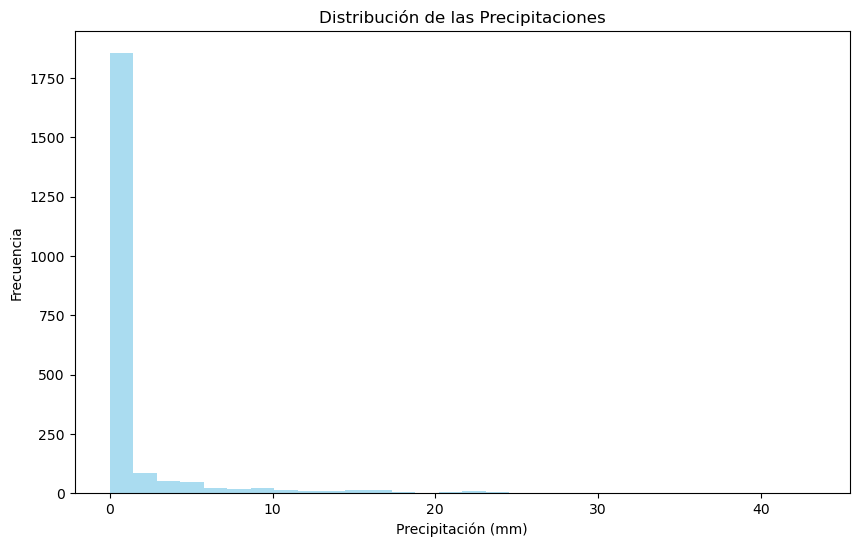

In [139]:
#12. Gráficos: 
    #a.  Distribución de las precipitaciones 

# a) Histograma de la distribución de precipitaciones
ax = df_2005['PREC'] \
       .plot(kind='hist',
             bins=30,
             figsize=(10, 6),
             color='skyblue',
             alpha=0.7,
             title='Distribución de las Precipitaciones')
ax.set_xlabel('Precipitación (mm)')
ax.set_ylabel('Frecuencia')

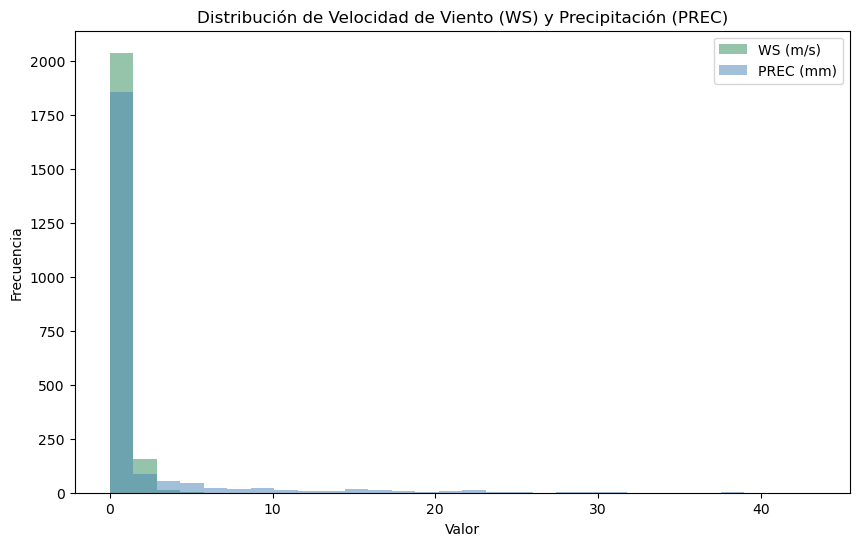

In [140]:
#12. Gráficos: 
    #b.  Distribución de ‘ws’ y ‘precipitaciones 

# b) Histograma comparado de WS y PREC (superpuestos)
ax2 = df_2005[['WS','PREC']] \
        .plot(kind='hist',
              bins=30,
              figsize=(10, 6),
              alpha=0.5,
              title='Distribución de Velocidad de Viento (WS) y Precipitación (PREC)',
              color=['seagreen','steelblue'])
ax2.set_xlabel('Valor')
ax2.set_ylabel('Frecuencia')
ax2.legend(['WS (m/s)', 'PREC (mm)'])

Explicación de para qué sirve cada gráfico:

a) Histograma de precipitaciones Permite ver en qué rango de valores (bins) se concentran la mayoría de los registros de lluvia, si la distribución está sesgada (poca lluvia vs. muchos días sin lluvia), y detectar posibles valores extremos (eventos de lluvia intensa).

b) Histograma comparado de WS y PREC Superpone ambas distribuciones para comparar de un vistazo: • ¿El viento (WS) tiene una variabilidad similar a la lluvia (PREC)? • ¿Hay rangos donde coinciden muchas observaciones de viento y de lluvia? • ¿Se aprecian diferencias en dispersión o picos (por ejemplo, días muy ventosos vs. días muy lluviosos)?

En ambos casos, el histograma es ideal para entender la forma de la distribución (simetría, sesgo), la dispersión y la presencia de outliers en tus variables meteorológicas.